<a href="https://colab.research.google.com/github/DavidF2714/TC3006B/blob/main/Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1
### Alumno: David Flores Becerril
### Matrícula: A01368391
### Inteligencia artificial avanzada para la ciencia de datos I
### Grupo 101


## ¿ K-Nearest Neighbors ?

El algoritmo K-Nearest Neighbors (KNN) es un método de aprendizaje supervisado utilizado para problemas de clasificación y regresión. Funciona comparando la similitud entre nuevos datos y ejemplos de entrenamiento mediante una medida de distancia (como Euclidiana o Manhattan), determinando así la clase o valor del dato nuevo según la mayoría o promedio de sus vecinos más cercanos. Para esta actividad se planea probar el funcionamiento de este algoritmo clasificando de acuerdo a un conjunto de datos de enfermedades cardiovasculares, si un individuo tiene presencia de esta misma.

Los objetivos de esta actividad, son:

• Reforzar la teoría de KNN aplicando el algoritmo de clasificación sobre
un conjunto de datos diferente y con una medida de distancia
distinta.
• Practica la teoría detrás del KNN en el contexto del lenguaje de
programación Python y Scikit-learn.


## Experimentación

Para resolver esta incógnita, se opto por utilizar la liberia de Scikit Learn, así como explorar alternativas entiendo a fondo el funcionamiento del algoritmo KNN con librerias como codecs, numpy, operator, statistics y matplotlib.

In [22]:
import codecs
import numpy as np
from operator import itemgetter
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
import time
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dados los archivos .txt de trainig y testing previamente prepresocedados a partir del conjunto de datos originales, extraeremos los features y labels para cada archivo

In [7]:
# Function to read data from the file
def read_data(file):
    features = []
    labels = []
    with codecs.open(file, 'r', 'utf-8') as f:
        for line in f:
            data = line.strip().split(',')
            features.append([float(x) for x in data[:-1]])
            labels.append(data[-1])
    return features, labels

# Read data
train_features, train_labels = read_data('/content/drive/My Drive/Colab Notebooks/TC3006B/training.txt')
test_features, test_labels = read_data('/content/drive/My Drive/Colab Notebooks/TC3006B/test.txt')

A continuación se definen las funciones de similitud indicadas por la actividad para encontrar la distancia entre los vecinos cercanos y poder determinar una clasificación

In [8]:
# Function to calculate Manhattan distance
def manhattan_distance(list1, list2):
    return np.sum(np.abs(np.array(list1) - np.array(list2)))

# Function to calculate Euclidean distance
def euclidean_distance(list1, list2):
    return np.sqrt(np.sum((np.array(list1) - np.array(list2)) ** 2))

# Function to calculate Chebyshev distance
def chebyshev_distance(list1, list2):
    return np.max(np.abs(np.array(list1) - np.array(list2)))

Utilizando una función de clasificación. Indicando los párametros adecuados de test, trainig list, training label, k y distancia de similitud preferida, se entrena el modelo y se obtienen las predicciones y con otra función se calcula la precisión para cada k dependiendo de la función párametro.

In [14]:
# Function to classify data
def classify(test_list, training_lists, training_labels, k, distance_func):
    distances = []
    # Calculate the distance between test list and all training lists
    for training_list, label in zip(training_lists, training_labels):
        value = distance_func(test_list, training_list)
        distances.append((value, label))
    # Sort the distances in increasing order
    distances.sort(key=itemgetter(0))
    vote_labels = [x[1] for x in distances[:k]]
    # Return the majority class as prediction
    return mode(vote_labels)

# Function to evaluate KNN
def evaluate_knn(train_features, train_labels, test_features, test_labels, distance_func, k_values):
    accuracies = []
    start_time = time.time()
    for k in k_values:
        correct_predictions = 0
        for test_point, true_label in zip(test_features, test_labels):
            prediction = classify(test_point, train_features, train_labels, k, distance_func)
            if prediction == true_label:
                correct_predictions += 1

        accuracy = correct_predictions / len(test_labels)
        accuracies.append(accuracy)
    end_time = time.time()
    execution_time = end_time - start_time
    return accuracies, execution_time

Para el caso de Scikit Learn, se utilizan los mismos parámetros pero utilizando las funciones proporcionadas por la libreria. Debido a la optimización de la libreria, podemos calcular su precisión en la misma función, con menos líneas de código comparado a específicar la función de similitud.

In [15]:
# Function to evaluate KNN using scikit-learn
def evaluate_knn_sklearn(train_features, train_labels, test_features, test_labels, k_values):
    accuracies = []
    start_time = time.time()
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_features, train_labels)
        predictions = knn.predict(test_features)
        accuracy = accuracy_score(test_labels, predictions)
        accuracies.append(accuracy)
    end_time = time.time()
    execution_time = end_time - start_time
    return accuracies, execution_time

Para cada función de similitud, se gráfica su comportamiento respecto a la cantidad de vecinos cercas vs su precisión, así cómo un gráfica comparativa de las cuatro soluciones realizadas durante la actividad. Además se añaden gráficas que comparan el tiempo de ejecución de cada función de similitud y su error de distribución para obtener con q k es la mejor.


In [24]:
# Function to plot individual accuracy curves
def plot_individual_accuracy_curves(k_values, accuracies, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, label=f'{metric_name} Distance', marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Number of Neighbors for {metric_name} Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot comparative accuracy curve
def plot_comparative_accuracy_curve(k_values, accuracies_dict):
    plt.figure(figsize=(10, 6))
    for metric_name, accuracies in accuracies_dict.items():
        plt.plot(k_values, accuracies, label=f'{metric_name} Distance', marker='o')

    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('Comparative Accuracy vs Number of Neighbors')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot execution time comparison
def plot_execution_time_comparison(execution_times):
    plt.figure(figsize=(10, 6))
    metrics = list(execution_times.keys())
    times = list(execution_times.values())
    plt.bar(metrics, times, color='skyblue')
    plt.xlabel('Distance Metric')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time Comparison for Different Distance Metrics')
    plt.grid(True)
    plt.show()

def plot_error_distribution(train_features, train_labels, test_features, test_labels, distance_metrics, k_values):
    plt.figure(figsize=(10, 6))

    # Custom distance metrics
    for metric_name, distance_func in distance_metrics.items():
        error_counts = []

        for k in k_values:
            predictions = []
            for test_point in test_features:
                prediction = classify(test_point, train_features, train_labels, k, distance_func)
                predictions.append(prediction)

            # Calculate number of errors
            errors = np.sum(np.array(predictions) != np.array(test_labels))
            error_counts.append(errors)

        plt.plot(k_values, error_counts, label=f'{metric_name} Distance', marker='o')

    # Scikit-Learn KNN
    error_counts_sklearn = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_features, train_labels)
        predictions = knn.predict(test_features)
        errors = np.sum(predictions != np.array(test_labels))
        error_counts_sklearn.append(errors)

    plt.plot(k_values, error_counts_sklearn, label='Scikit-Learn KNN', marker='o')

    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Number of Errors')
    plt.title('Error Distribution vs Number of Neighbors')
    plt.legend()
    plt.grid(True)
    plt.show()

## Resultados

Finalmente se mandan a llamar todas las funciones en nuestra función main, especificando los párametros a probar (k y distance_metrics). Para cáda métrica de distancia y scikit learn, se ejecutan pruebas de 3 hasta 41 vecinos cercanos y se obtienen su precisión. Encontrando para cada uno, su mejor precisión de acuerdo a su cantidad de vecinos y se gráfican.

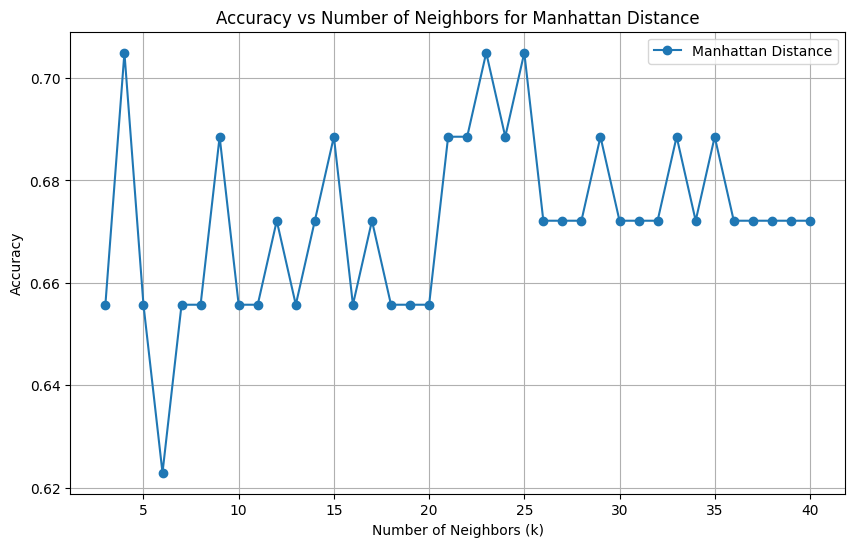

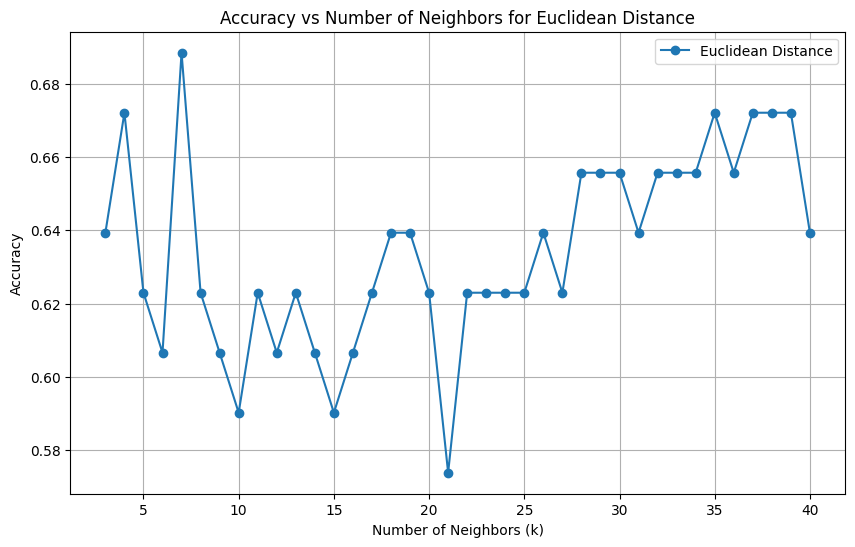

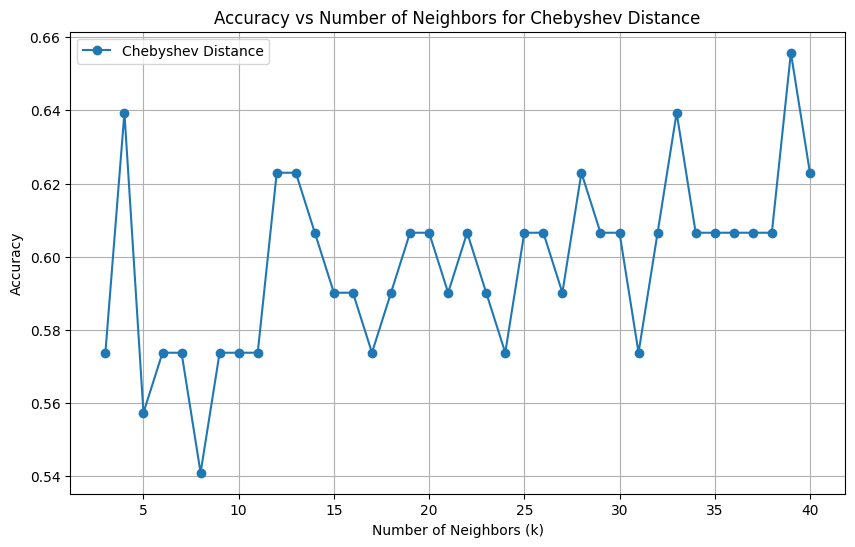

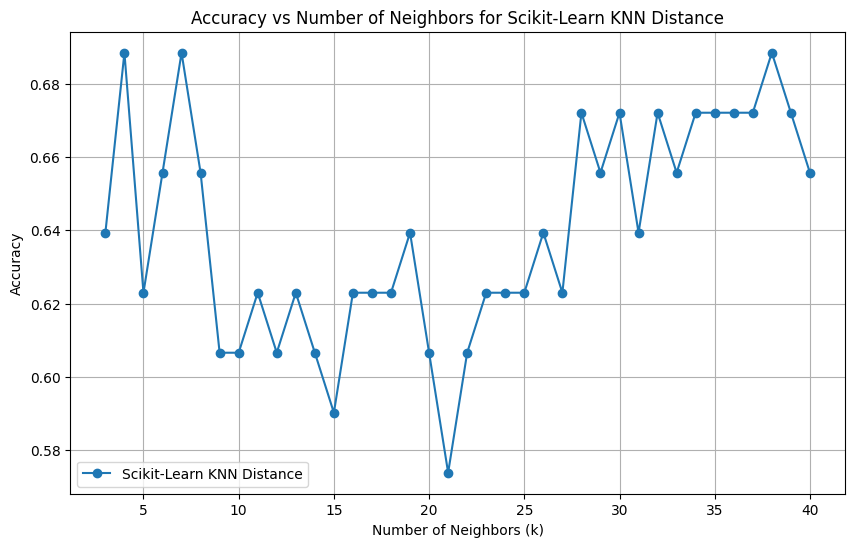

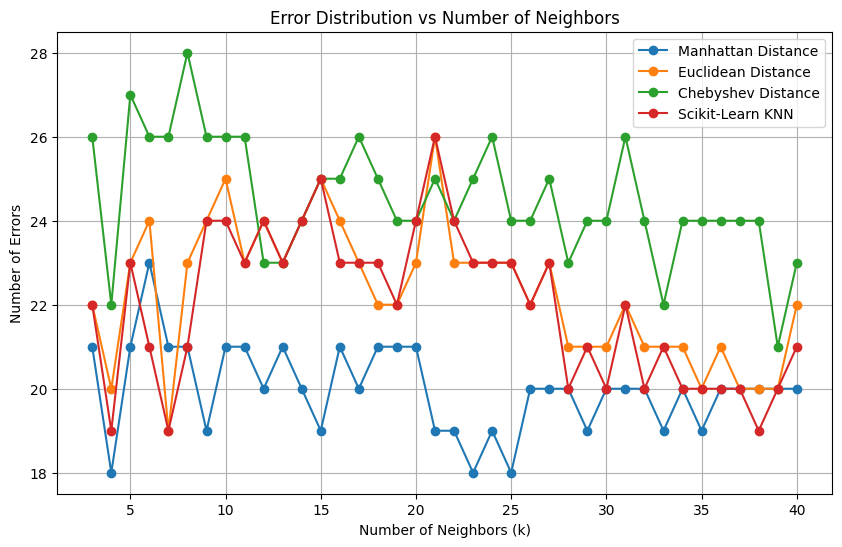

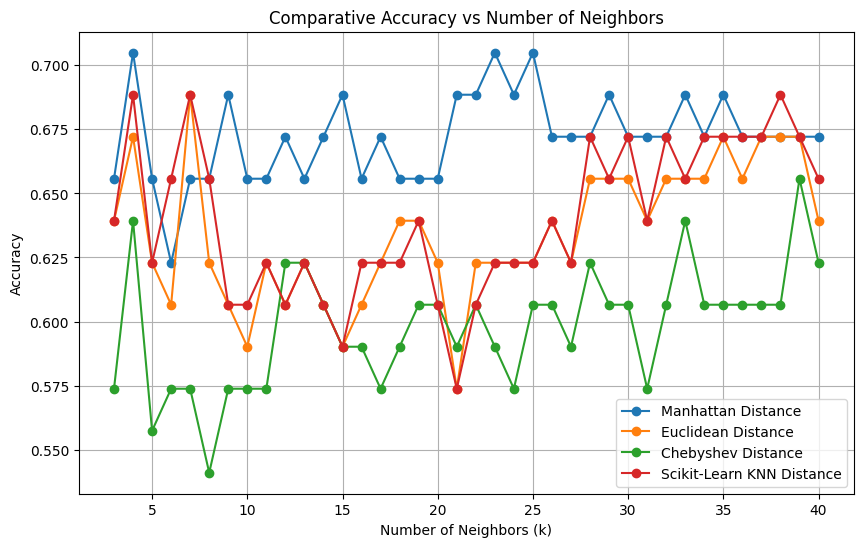

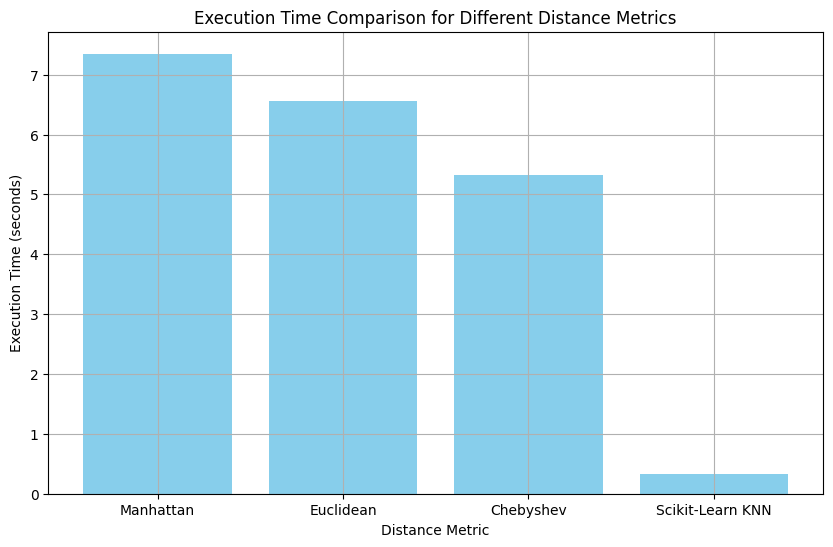

Best accuracy for Manhattan distance is 0.7049180327868853 with k=4
Best accuracy for Euclidean distance is 0.6885245901639344 with k=7
Best accuracy for Chebyshev distance is 0.6557377049180327 with k=39
Best accuracy for Scikit-Learn KNN distance is 0.6885245901639344 with k=4


In [25]:
def main():
    k_values = range(3, 41)
    distance_metrics = {
        "Manhattan": manhattan_distance,
        "Euclidean": euclidean_distance,
        "Chebyshev": chebyshev_distance
    }

    accuracies_dict = {}
    execution_times = {}

    # Evaluate each distance metric
    for metric_name, distance_func in distance_metrics.items():
        accuracies, execution_time = evaluate_knn(train_features, train_labels, test_features, test_labels, distance_func, k_values)
        accuracies_dict[metric_name] = accuracies
        execution_times[metric_name] = execution_time

        # Plot individual accuracy curve for each metric
        plot_individual_accuracy_curves(k_values, accuracies, metric_name)

    # Evaluate and plot using Scikit-Learn KNN
    accuracies_sklearn, execution_time_sklearn = evaluate_knn_sklearn(train_features, train_labels, test_features, test_labels, k_values)
    accuracies_dict['Scikit-Learn KNN'] = accuracies_sklearn
    execution_times['Scikit-Learn KNN'] = execution_time_sklearn
    plot_individual_accuracy_curves(k_values, accuracies_sklearn, 'Scikit-Learn KNN')

    plot_error_distribution(train_features, train_labels, test_features, test_labels, distance_metrics, k_values)

    # Plot comparative accuracy curve
    plot_comparative_accuracy_curve(k_values, accuracies_dict)

    # Plot execution time comparison
    plot_execution_time_comparison(execution_times)

    # Print best accuracies for each metric
    for metric_name, accuracies in accuracies_dict.items():
        best_accuracy = max(accuracies)
        best_k = k_values[accuracies.index(best_accuracy)]
        print(f'Best accuracy for {metric_name} distance is {best_accuracy} with k={best_k}')

if __name__ == '__main__':
    main()

## Conclusiones

En esta notebook, se exploró el algoritmo KNN para clasificar enfermedades cardiovasculares. Se experimentó con diferentes métricas de distancia (Manhattan, Euclidiana, Chebyshev) y la implementación de Scikit-learn, evaluando su precisión con varios valores de k.
Se encontró la mejor precisión y el valor óptimo de k para cada métrica, y se visualizaron los resultados con gráficas comparativas.
Este análisis permitió entender el impacto de las métricas de distancia y el número de vecinos en la precisión del modelo KNN para este conjunto de datos. Así mismo se puede probar que en efecto la libreria de Scikit learn hace un gran trabajo de optimización pues fue la más eficiente en cuanto a tiempo de ejecución.